https://www.kaggle.com/c/avazu-ctr-prediction/data
    
Susan Li 

In [38]:
import numpy as np
import random
n = 40428967  #total number of records in the clickstream data 
sample_size = 100000

In [39]:
skip_values = sorted(random.sample(range(1,n), n - sample_size))

In [40]:
types_train = {
    'id': np.dtype(int),
    'click': np.dtype(int),
    'hour': np.dtype(int),
    'C1': np.dtype(int),
    'banner_pos': np.dtype(int),
    'site_id': np.dtype(str),
    'site_domain': np.dtype(str), 
    'site_category': np.dtype(str),
    'app_id': np.dtype(str),
    'app_domain': np.dtype(str),
    'app_category': np.dtype(str),
    'device_id': np.dtype(str),
    'device_ip': np.dtype(str),
    'device_model': np.dtype(str),
    'device_type': np.dtype(int),
    'device_conn_type': np.dtype(int),
    'C14': np.dtype(int),
    'C15': np.dtype(int),
    'C16': np.dtype(int),
    'C17': np.dtype(int),
    'C18': np.dtype(int),
    'C19': np.dtype(int),
    'C20': np.dtype(int),
    'C21':np.dtype(int)
}

types_test = {
    'id': np.dtype(int),
    'hour': np.dtype(int),
    'C1': np.dtype(int),
    'banner_pos': np.dtype(int),
    'site_id': np.dtype(str),
    'site_domain': np.dtype(str), 
    'site_category': np.dtype(str),
    'app_id': np.dtype(str),
    'app_domain': np.dtype(str),
    'app_category': np.dtype(str),
    'device_id': np.dtype(str),
    'device_ip': np.dtype(str),
    'device_model': np.dtype(str),
    'device_type': np.dtype(int),
    'device_conn_type': np.dtype(int),
    'C14': np.dtype(int),
    'C15': np.dtype(int),
    'C16': np.dtype(int),
    'C17': np.dtype(int),
    'C18': np.dtype(int),
    'C19': np.dtype(int),
    'C20': np.dtype(int),
    'C21':np.dtype(int)
}

In [41]:
import pandas as pd
import gzip

In [42]:
parse_date = lambda val: pd.datetime.strptime(val, '%y%m%d%H')

with gzip.open('train.gz') as f:
    train = pd.read_csv(f, parse_dates = ['hour'], date_parser = parse_date, dtype=types_train, skiprows=skip_values)

train.head()

,id,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,...,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
0,681034673,0,2014-10-21,1005,0,d7f3460b,f7570339,f028772b,ecad2386,7801e8d9,...,1,0,17212,320,50,1887,3,39,-1,23
1,-1906492416,0,2014-10-21,1005,0,0d0207b0,274ddcab,f028772b,ecad2386,7801e8d9,...,1,0,20366,320,50,2333,0,39,-1,157
2,-1402616595,0,2014-10-21,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15704,320,50,1722,0,35,-1,79
3,-1958694714,0,2014-10-21,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15707,320,50,1722,0,35,100084,79
4,-483184092,0,2014-10-21,1005,1,fe8cc448,9166c161,0569f928,ecad2386,7801e8d9,...,1,0,18993,320,50,2161,0,35,-1,157


In [43]:
train.shape

(100000, 24)

In [44]:
train.dtypes

id                           int32
click                        int32
hour                datetime64[ns]
C1                           int32
banner_pos                   int32
site_id                     object
site_domain                 object
site_category               object
app_id                      object
app_domain                  object
app_category                object
device_id                   object
device_ip                   object
device_model                object
device_type                  int32
device_conn_type             int32
C14                          int32
C15                          int32
C16                          int32
C17                          int32
C18                          int32
C19                          int32
C20                          int32
C21                          int32
dtype: object

In [45]:
train['click'].value_counts()

0    83051
1    16949
Name: click, dtype: int64

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

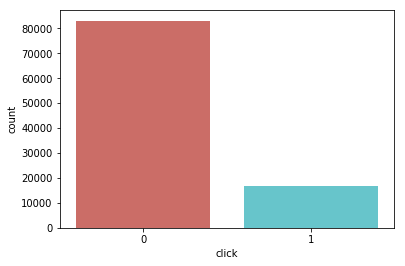

In [47]:
sns.countplot(x='click', data=train, palette='hls')
plt.show()

In [48]:
train['click'].value_counts()/len(train)

0    0.83051
1    0.16949
Name: click, dtype: float64

In [49]:
train.hour.describe()

count                  100000
unique                    240
top       2014-10-22 09:00:00
freq                     1170
first     2014-10-21 00:00:00
last      2014-10-30 23:00:00
Name: hour, dtype: object

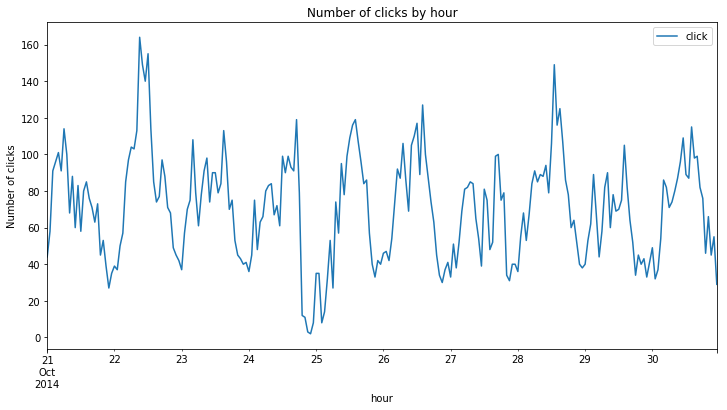

In [50]:
train.groupby('hour').agg({'click':'sum'}).plot(figsize=(12,6))
plt.ylabel('Number of clicks')
plt.title('Number of clicks by hour')
plt.show()

In [51]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 24 columns):
id                  100000 non-null int32
click               100000 non-null int32
hour                100000 non-null datetime64[ns]
C1                  100000 non-null int32
banner_pos          100000 non-null int32
site_id             100000 non-null object
site_domain         100000 non-null object
site_category       100000 non-null object
app_id              100000 non-null object
app_domain          100000 non-null object
app_category        100000 non-null object
device_id           100000 non-null object
device_ip           100000 non-null object
device_model        100000 non-null object
device_type         100000 non-null int32
device_conn_type    100000 non-null int32
C14                 100000 non-null int32
C15                 100000 non-null int32
C16                 100000 non-null int32
C17                 100000 non-null int32
C18                 100000 non-n

In [52]:
train['hour_of_day'] = train.hour.apply(lambda x: x.hour)

In [53]:
train.hour_of_day.unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23], dtype=int64)

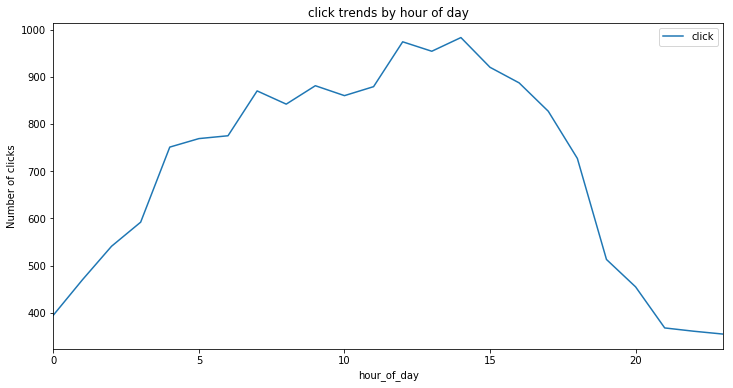

In [54]:
train.groupby('hour_of_day').agg({'click':'sum'}).plot(figsize=(12,6))
plt.ylabel('Number of clicks')
plt.title('click trends by hour of day');
plt.show()

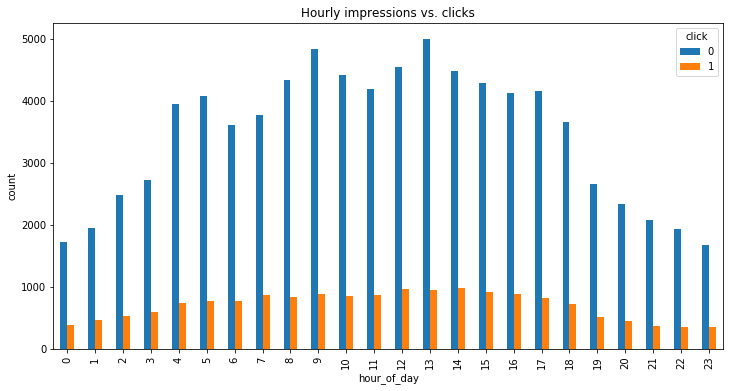

In [55]:
train.groupby(['hour_of_day', 'click']).size().unstack().plot(figsize=(12,6), kind='bar')
plt.ylabel('count')
plt.title('Hourly impressions vs. clicks')
plt.show()

In [56]:
df_click = train[train['click'] == 1]
df_hour = train[['hour_of_day','click']].groupby('hour_of_day').count().reset_index()
df_hour = df_hour.rename(columns={'click':'impressions'})
df_hour['clicks'] = df_click[['hour_of_day','click']].groupby('hour_of_day').count().reset_index()['click']
df_hour['CTR'] = df_hour['clicks']/df_hour['impressions'] * 100

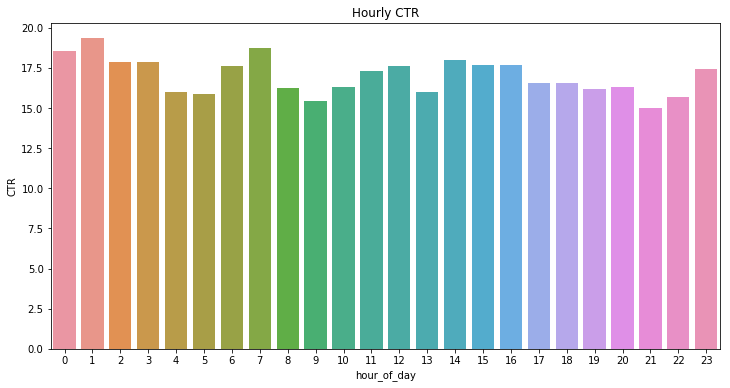

In [57]:
plt.figure(figsize=(12,6))
sns.barplot(y='CTR', x='hour_of_day', data=df_hour)
plt.title('Hourly CTR')
plt.show()

#### Days of Week

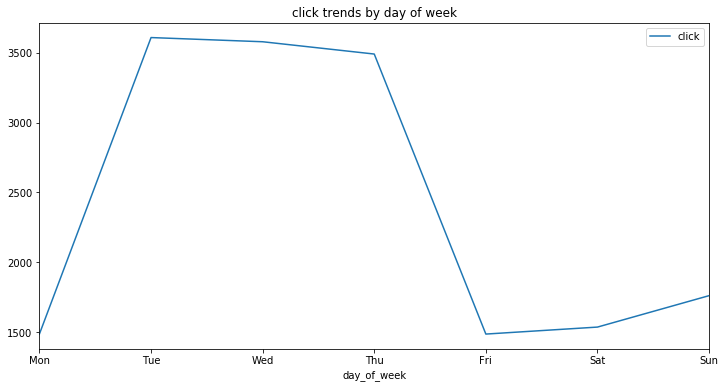

In [58]:
train['day_of_week'] = train['hour'].apply(lambda val: val.weekday_name)
cats = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
train.groupby('day_of_week').agg({'click':'sum'}).reindex(cats).plot(figsize=(12,6))
ticks = list(range(0,7,1))
labels = 'Mon Tue Wed Thu Fri Sat Sun'.split()
plt.xticks(ticks, labels)
plt.title('click trends by day of week')
plt.show()

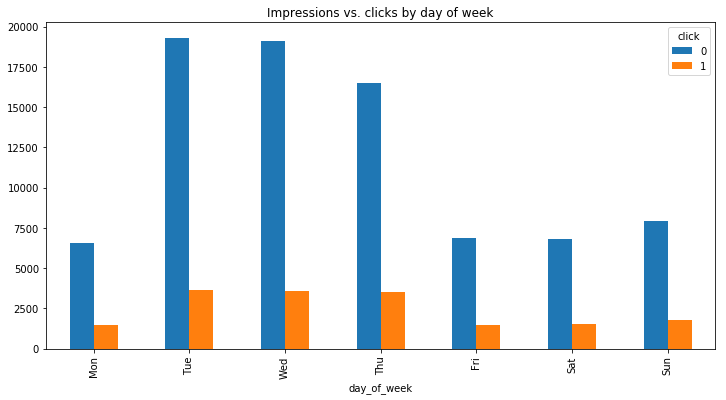

In [59]:
# train.head()
train.groupby(['day_of_week', 'click']).size().unstack().reindex(cats).plot(kind='bar', figsize=(12,6), title='Day of the Week.')
ticks = list(range(0,7,1))
labels = 'Mon Tue Wed Thu Fri Sat Sun'.split()
plt.xticks(ticks, labels)
plt.title('Impressions vs. clicks by day of week');
plt.show()

Text(0.5,1,'Day of week CTR')

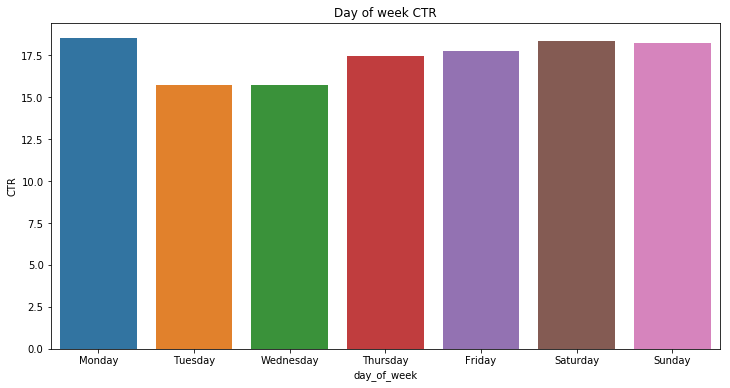

In [60]:
df_click = train[train['click']==1]
df_dayofweek = train[['day_of_week', 'click']].groupby('day_of_week').count().reset_index()
df_dayofweek = df_dayofweek.rename(columns={'click':'impressions'})
df_dayofweek['click'] = df_click[['day_of_week', 'click']].groupby('day_of_week').count().reset_index()['click']
df_dayofweek['CTR'] = df_dayofweek['click']/df_dayofweek['impressions'] * 100

plt.figure(figsize=(12,6))
sns.barplot(y='CTR', x='day_of_week', data=df_dayofweek, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Day of week CTR')
# plt.show()

In [61]:
print(train.C1.value_counts()/len(train))

1005    0.91841
1002    0.05529
1010    0.02236
1012    0.00254
1007    0.00094
1001    0.00024
1008    0.00022
Name: C1, dtype: float64


In [62]:
C1_values = train.C1.unique()
C1_values.sort()
ctr_avg_list=[]
for i in C1_values:
    ctr_avg=train.loc[np.where((train.C1 == i))].click.mean()
    ctr_avg_list.append(ctr_avg)
    print("for C1 value: {},  click through rate: {}".format(i,ctr_avg))

for C1 value: 1001,  click through rate: 0.0
for C1 value: 1002,  click through rate: 0.21486706456863808
for C1 value: 1005,  click through rate: 0.16866105551986585
for C1 value: 1007,  click through rate: 0.05319148936170213
for C1 value: 1008,  click through rate: 0.13636363636363635
for C1 value: 1010,  click through rate: 0.09570661896243292
for C1 value: 1012,  click through rate: 0.19291338582677164


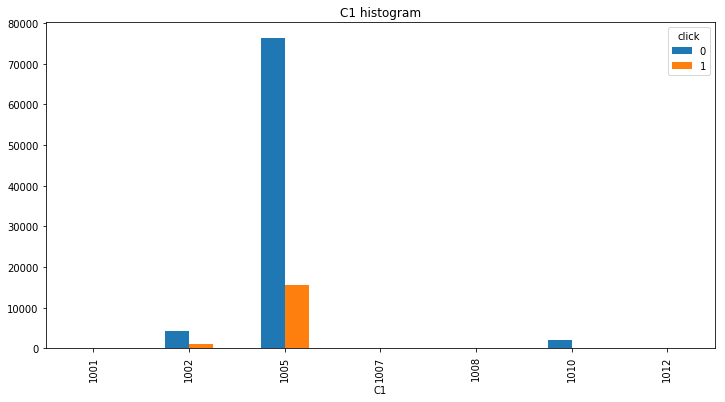

In [63]:
train.groupby(['C1', 'click']).size().unstack().plot(kind='bar', figsize=(12, 6), title='C1 histogram')

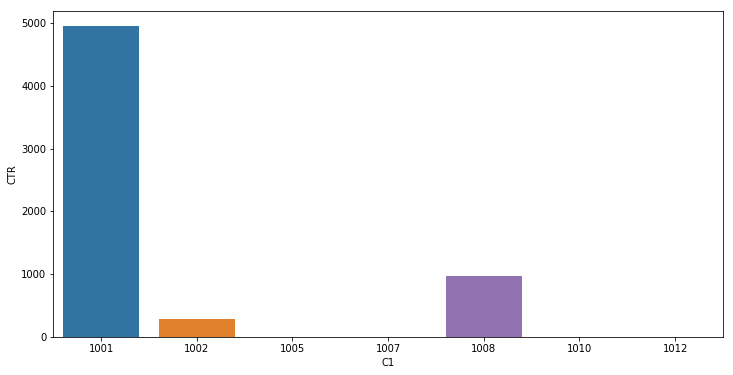

In [64]:
df_C1 = train[['C1', 'click']].groupby('C1').count().reset_index()
df_C1 = df_C1.rename(columns={'click':'impressions'})
df_C1['click'] = df_click[['C1','click']].groupby('C1').count().reset_index()['click']
df_C1['CTR'] = df_C1['click']/df_C1['impressions'] * 100

plt.figure(figsize=(12,6))
sns.barplot(x='C1', y='CTR', data=df_C1)

### Banner Position

In [65]:
print(train.banner_pos.value_counts()/len(train))

0    0.72280
1    0.27522
7    0.00117
2    0.00031
4    0.00023
5    0.00022
3    0.00005
Name: banner_pos, dtype: float64


In [66]:
banner_values = train.banner_pos.unique()
banner_values.sort()
ctr_avg_list=[]
for i in banner_values:
    ctr_avg=train.loc[np.where((train.banner_pos == i))].click.mean()
    ctr_avg_list.append(ctr_avg)
    print("for banner value: {},  click through rate: {}".format(i,ctr_avg))

for banner value: 0,  click through rate: 0.16225788599889318
for banner value: 1,  click through rate: 0.18784972022382093
for banner value: 2,  click through rate: 0.0967741935483871
for banner value: 3,  click through rate: 0.0
for banner value: 4,  click through rate: 0.34782608695652173
for banner value: 5,  click through rate: 0.13636363636363635
for banner value: 7,  click through rate: 0.3162393162393162


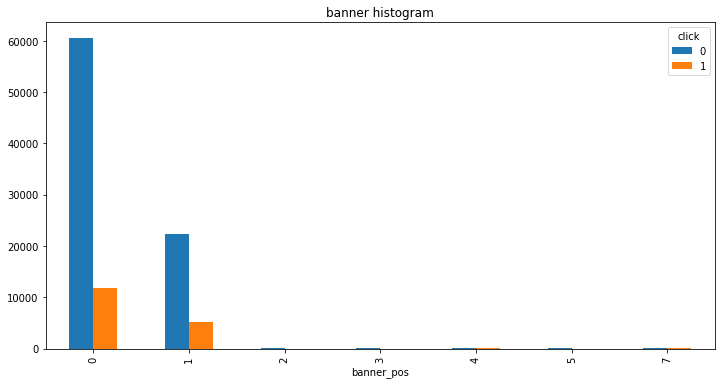

In [67]:
train.groupby(['banner_pos', 'click']).size().unstack().plot(kind='bar', figsize=(12, 6), title='banner histogram')

Text(0.5,1,'CTR by banner position')

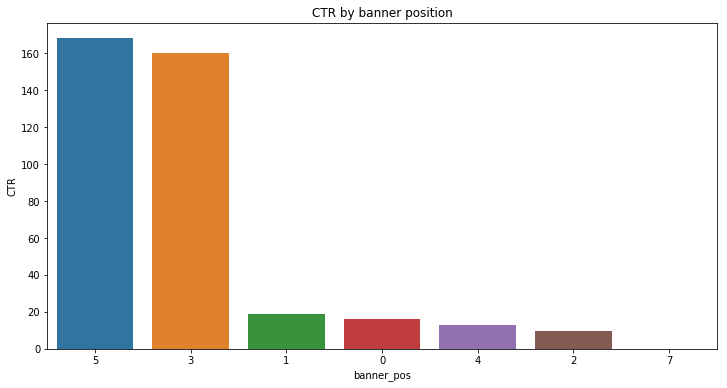

In [68]:
df_banner = train[['banner_pos', 'click']].groupby('banner_pos').count().reset_index()
df_banner = df_banner.rename(columns={'click':'impressions'})
df_banner['click'] = df_click[['banner_pos','click']].groupby('banner_pos').count().reset_index()['click']
df_banner['CTR'] = df_banner['click']/df_banner['impressions'] * 100
sort_banners = df_banner.sort_values(by='CTR',ascending=False)['banner_pos'].tolist()
plt.figure(figsize=(12,6))
sns.barplot(x='banner_pos', y='CTR', data=df_banner, order=sort_banners)
plt.title('CTR by banner position')

In [69]:
df_banner.CTR.describe()

count      6.000000
mean      64.318913
std       77.386724
min        9.677419
25%       13.839056
50%       17.505380
75%      124.696243
max      168.181818
Name: CTR, dtype: float64

#### Site Features

In [70]:
train.site_id.nunique()

1456

In [71]:
train.site_id.value_counts()[:10]

85f751fd    36386
1fbe01fe    16032
e151e245     6634
d9750ee7     2345
5b08c53b     2244
5b4d2eda     1916
856e6d3f     1780
a7853007     1114
b7e9786d      950
5bcf81a2      845
Name: site_id, dtype: int64

In [75]:
print((train.site_id.value_counts()/len(train))[:10])

85f751fd    0.36386
1fbe01fe    0.16032
e151e245    0.06634
d9750ee7    0.02345
5b08c53b    0.02244
5b4d2eda    0.01916
856e6d3f    0.01780
a7853007    0.01114
b7e9786d    0.00950
5bcf81a2    0.00845
Name: site_id, dtype: float64


within top 10 site ids, how much is the average CTR for those ids.

In [87]:
top10_ids = (train.site_id.value_counts()/len(train))[:10].index
ctr_avg_list=[]
for i in top10_ids:
    ctr_avg = train.loc[np.where((train.site_id == i))].click.mean()
    ctr_avg_list.append(ctr_avg)
    print(ctr_avg)

0.11716044632550981
0.20434131736526945
0.2992161591799819
0.270362473347548
0.4710338680926916
0.13100208768267224
0.035955056179775284
0.12118491921005387
0.07263157894736842
0.10887573964497041


In [89]:
top10_sites = train.loc[np.where(train.site_id.isin((train.site_id.value_counts()/len(train))[:10].index))]

70246

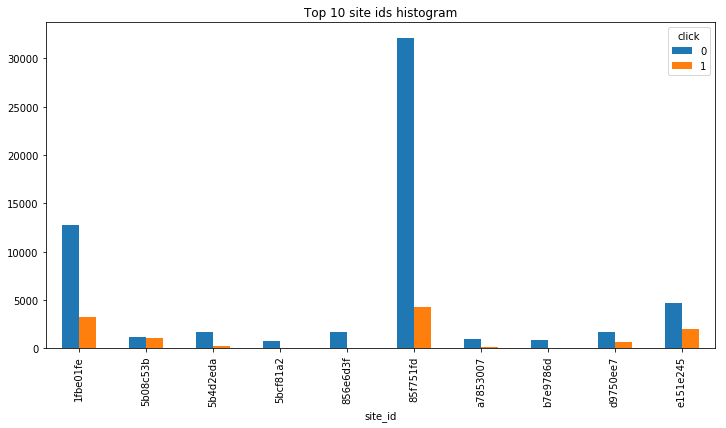

In [93]:
top10_sites.groupby(['site_id', 'click']).size().unstack().plot(kind='bar', figsize=(12,6), title='Top 10 site ids histogram')

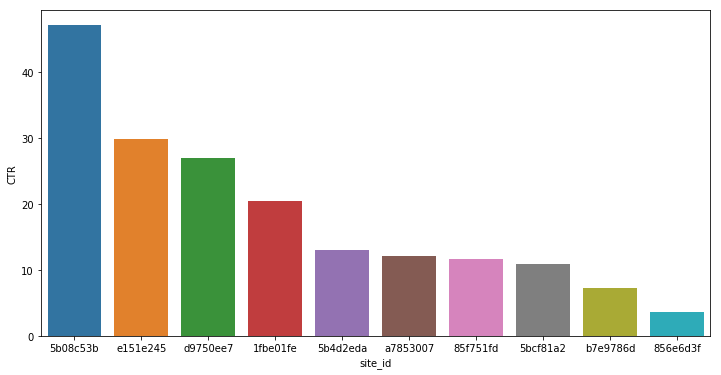

In [116]:
top10_sites_click = top10_sites[top10_sites['click'] == 1]
df_sites = top10_sites[['site_id', 'click']].groupby('site_id').count().reset_index()
df_sites = df_sites.rename(columns={'click':'impressions'})
df_sites['click'] = top10_sites_click.groupby('site_id').count().reset_index()['click']
df_sites['CTR'] = df_sites['click']/df_sites['impressions'] * 100
sort_sites = df_sites.sort_values('CTR', ascending=False)['site_id'].tolist()
plt.figure(figsize=(12,6))
sns.barplot(y='CTR', x='site_id', data=df_sites, order=sort_sites)

#### Site Domain

In [120]:
print(train.site_domain.nunique())

1307


In [122]:
train.site_domain.value_counts()[:10]/len(train)

c4e18dd6    0.37766
f3845767    0.16032
7e091613    0.08306
7687a86e    0.03176
98572c79    0.02420
16a36ef3    0.02132
58a89a43    0.01780
b12b9f85    0.00953
9d54950b    0.00932
968765cd    0.00824
Name: site_domain, dtype: float64

Within top 10 domain, how much is the average CTR

In [128]:
top10_domains = train.site_domain.value_counts()[:10].index
ctr_avg_list = []
for i in top10_domains:
    ctr_avg = train.loc[np.where(train.site_domain == i)].click.mean()
    ctr_avg_list.append(ctr_avg)
    print('ctr_avg:', ctr_avg)

ctr_avg: 0.12145845469469893
ctr_avg: 0.20434131736526945
ctr_avg: 0.2646279797736576
ctr_avg: 0.45717884130982367
ctr_avg: 0.2652892561983471
ctr_avg: 0.1477485928705441
ctr_avg: 0.035955056179775284
ctr_avg: 0.07240293809024134
ctr_avg: 0.10407725321888411
ctr_avg: 0.12257281553398058


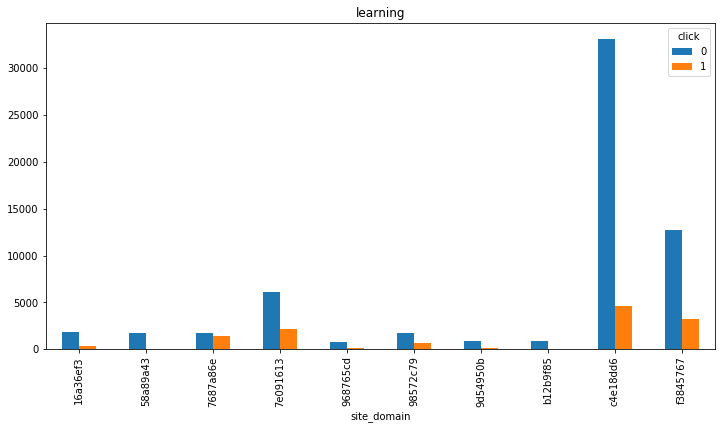

In [133]:
top10_domain = train.loc[np.where(train.site_domain.isin(top10_domains))]
top10_domain.groupby(['site_domain','click']).size().unstack().plot(kind='bar', figsize=(12,6), title = 'learning')

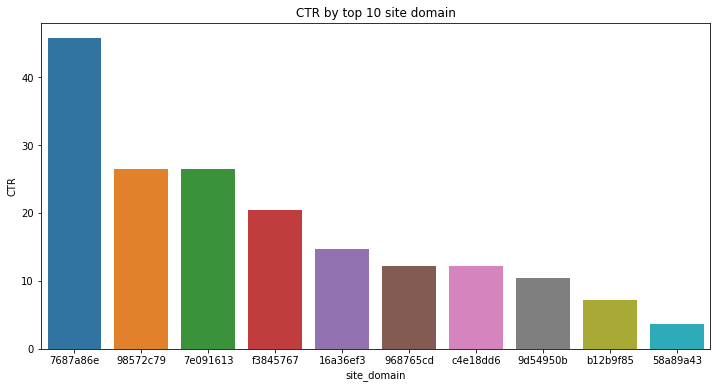

In [158]:
# top10 domains
# count the total impression in above domains.
# count the total click in above domains.
# calculate ctr (avearge value).
# plot that in descending order

top10_domain_click = top10_domain[top10_domain.click == 1]
df_domain = top10_domain[['site_domain', 'click']].groupby('site_domain').count().reset_index()
df_domain = df_domain.rename(columns={'click':'impressions'})
df_domain['click'] = top10_domain_click[['site_domain', 'click']].groupby('site_domain').count().reset_index()['click']
df_domain['CTR'] = df_domain['click']/df_domain['impressions'] * 100
sort_domains = df_domain.sort_values('CTR', ascending=False)['site_domain'].tolist()
plt.figure(figsize=(12, 6))
sns.barplot(y='CTR', x='site_domain', data=df_domain, order=sort_domains)
plt.title('CTR by top 10 site domain');
# df_domain

#### site category

In [159]:
train.columns

Index(['id', 'click', 'hour', 'C1', 'banner_pos', 'site_id', 'site_domain',
       'site_category', 'app_id', 'app_domain', 'app_category', 'device_id',
       'device_ip', 'device_model', 'device_type', 'device_conn_type', 'C14',
       'C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21', 'hour_of_day',
       'day_of_week'],
      dtype='object')

In [161]:
print('There are {} category available in the dataset.'.format(train.site_category.nunique()))

There are 20 category available in the dataset.


In [164]:
train.site_category.value_counts()[:10]/len(train)

50e219e0    0.41217
f028772b    0.31159
28905ebd    0.18197
3e814130    0.07488
f66779e6    0.00644
75fa27f6    0.00376
335d28a8    0.00306
76b2941d    0.00237
c0dd3be3    0.00091
72722551    0.00077
Name: site_category, dtype: float64

In [167]:
top10_cat = train.site_category.value_counts()[:10].index
ctr_avg_list = []
for i in top10_cat:
    ctr_avg = train.loc[np.where(train.site_category == i)].click.mean()
    ctr_avg_list.append(ctr_avg)
    print('CTR {} Average {} :'.format(i, ctr_avg))

CTR 50e219e0 Average 0.12735036514059733 :
CTR f028772b Average 0.1813922141275394 :
CTR 28905ebd Average 0.20624278727262735 :
CTR 3e814130 Average 0.28405448717948717 :
CTR f66779e6 Average 0.034161490683229816 :
CTR 75fa27f6 Average 0.11436170212765957 :
CTR 335d28a8 Average 0.11437908496732026 :
CTR 76b2941d Average 0.05485232067510549 :
CTR c0dd3be3 Average 0.0989010989010989 :
CTR 72722551 Average 0.06493506493506493 :


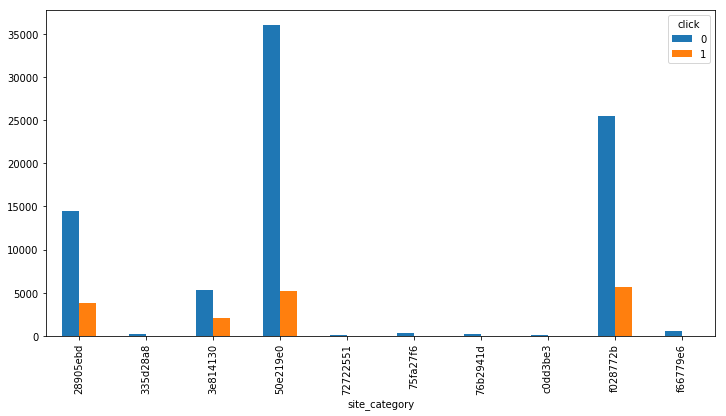

In [171]:
top10_category = train.loc[np.where(train.site_category.isin(top10_cat))]
top10_category.groupby(['site_category', 'click']).size().unstack().plot(kind='bar', figsize=(12,6))

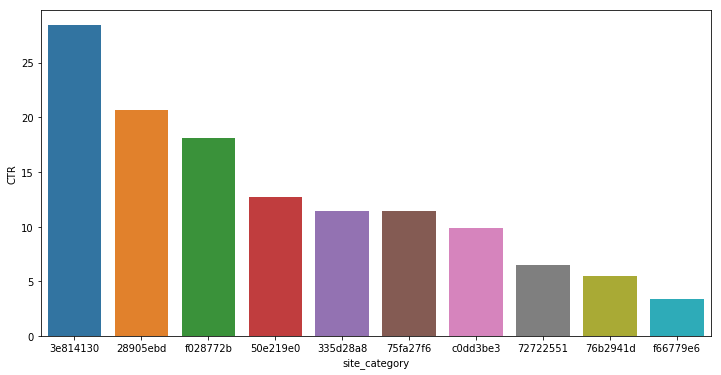

In [180]:
# get top10 category
# count the total impression in above category.
# count the total click in above category.
# calculate ctr (avearge value).
# plot that in descending order.
top10_category_click = top10_category[top10_category.click == 1]
df_category = top10_category[['site_category', 'click']].groupby('site_category').count().reset_index()
df_category = df_category.rename(columns={'click':'impressions'})
df_category['click'] = top10_category_click[['site_category', 'click']].groupby('site_category').count().reset_index()['click']
df_category['CTR'] = df_category['click']/df_category['impressions'] * 100
sort_category = df_category.sort_values('CTR', ascending=False)['site_category'].tolist()
plt.figure(figsize=(12,6))
sns.barplot(y='CTR', x='site_category', data=df_category, order=sort_category)

#### device id

In [181]:
print("There are {} devices in the data set".format(train.device_id.nunique()))

There are 16980 devices in the data set


In [182]:
print('The top 10 devices that have the most impressions')
print((train.device_id.value_counts()/len(train))[0:10])

The top 10 devices that have the most impressions
a99f214a    0.82369
0f7c61dc    0.00061
c357dbff    0.00051
936e92fb    0.00041
afeffc18    0.00017
3cdb4052    0.00014
28dc8687    0.00010
b09da1c4    0.00010
987552d1    0.00008
d857ffbb    0.00008
Name: device_id, dtype: float64


In [183]:
top10_devices = (train.device_id.value_counts()/len(train))[0:10].index
click_avg_list=[]

for i in top10_devices:
    click_avg=train.loc[np.where((train.device_id == i))].click.mean()
    click_avg_list.append(click_avg)
    print("for device id value: {},  click through rate: {}".format(i,click_avg))

for device id value: a99f214a,  click through rate: 0.17352401995896513
for device id value: 0f7c61dc,  click through rate: 0.8032786885245902
for device id value: c357dbff,  click through rate: 0.5098039215686274
for device id value: 936e92fb,  click through rate: 0.024390243902439025
for device id value: afeffc18,  click through rate: 0.23529411764705882
for device id value: 3cdb4052,  click through rate: 0.8571428571428571
for device id value: 28dc8687,  click through rate: 0.0
for device id value: b09da1c4,  click through rate: 0.2
for device id value: 987552d1,  click through rate: 0.0
for device id value: d857ffbb,  click through rate: 0.0


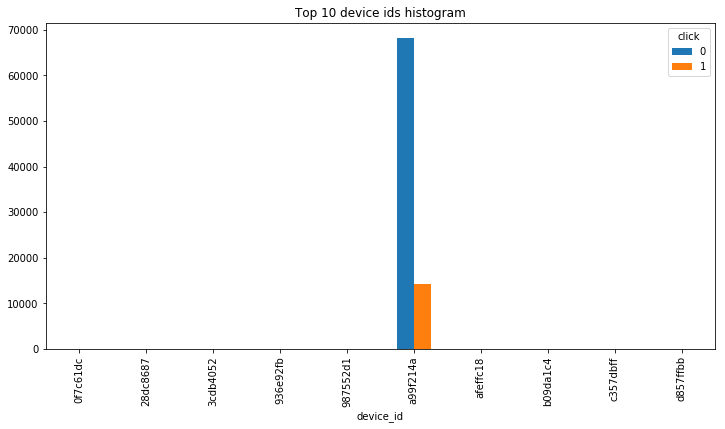

In [184]:
top10_device = train[(train.device_id.isin((train.device_id.value_counts()/len(train))[0:10].index))]
top10_device_click = top10_device[top10_device['click'] == 1]
top10_device.groupby(['device_id', 'click']).size().unstack().plot(kind='bar', figsize=(12,6), title='Top 10 device ids histogram');

In [186]:
train.columns

Index(['id', 'click', 'hour', 'C1', 'banner_pos', 'site_id', 'site_domain',
       'site_category', 'app_id', 'app_domain', 'app_category', 'device_id',
       'device_ip', 'device_model', 'device_type', 'device_conn_type', 'C14',
       'C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21', 'hour_of_day',
       'day_of_week'],
      dtype='object')

In [191]:
print(train.device_ip.nunique())
print(train.device_model.nunique())
print(train.device_type.nunique())
print(train.device_conn_type.nunique())

77915
3166
5
4


In [193]:
train.device_type.value_counts()/len(train)

1    0.92234
0    0.05529
4    0.01921
5    0.00315
2    0.00001
Name: device_type, dtype: float64

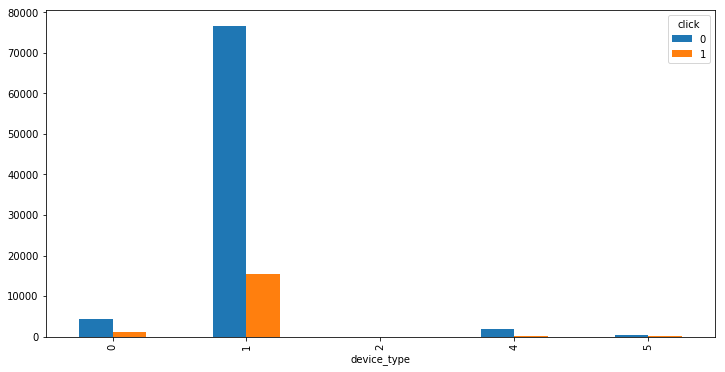

In [197]:
train[['device_type', 'click']].groupby(['device_type','click']).size().unstack().plot(kind='bar', figsize=(12,6))

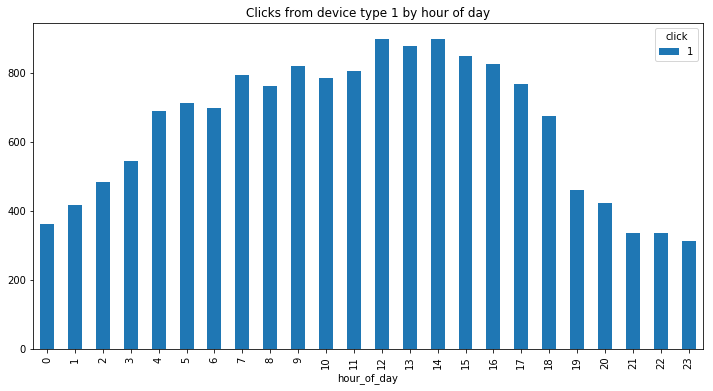

In [198]:
df_click[df_click['device_type']==1].groupby(['hour_of_day', 'click']).size().unstack().plot(kind='bar', title="Clicks from device type 1 by hour of day", figsize=(12,6));

In [199]:
device_type_click = df_click.groupby('device_type').agg({'click':'sum'}).reset_index()
device_type_impression = train.groupby('device_type').agg({'click':'count'}).reset_index().rename(columns={'click': 'impressions'})
merged_device_type = pd.merge(left = device_type_click , right = device_type_impression, how = 'inner', on = 'device_type')

In [200]:
merged_device_type['CTR'] = merged_device_type['click'] / merged_device_type['impressions']*100

In [201]:
merged_device_type

,device_type,click,impressions,CTR
0,0,1188,5529,21.486706
1,1,15547,92234,16.856040
2,4,182,1921,9.474232
3,5,32,315,10.158730


In [202]:
def convert_obj_to_int(self):
    
    object_list_columns = self.columns
    object_list_dtypes = self.dtypes
    new_col_suffix = '_int'
    
    for index in range(len(object_list_columns)):
        if object_list_dtypes[index] == 'object':
            self[object_list_columns[index]+new_col_suffix] = self[object_list_columns[index]].map(lambda x: hash(x))
            self.drop(object_list_columns[index], axis=1, inplace=True)
    return self

In [203]:
train = convert_obj_to_int(train)

In [205]:
train.drop('hour', axis=1, inplace=True)

In [206]:
train.drop('id', axis=1, inplace=True)

In [227]:
import lightgbm as lgb

In [214]:
X_train = train.loc[:, train.columns != 'click']
y_target = train.click.values

In [228]:
msk = np.random.rand(len(X_train)) < 0.8
lgb_train = lgb.Dataset(X_train[msk], y_target[msk])
lgb_eval = lgb.Dataset(X_train[~msk], y_target[~msk], reference=lgb_train)


In [231]:
params = {
    'task': 'train',
    'boosting_type': 'gbdt',
    'objective': 'binary',
    'metric': { 'binary_logloss'},
    'num_leaves': 31, # defauly leaves(31) amount for each tree
    'learning_rate': 0.08,
    'feature_fraction': 0.7, # will select 70% features before training each tree
    'bagging_fraction': 0.3, #feature_fraction, but this will random select part of data
    'bagging_freq': 5, #  perform bagging at every 5 iteration
    'verbose': 0
}

print('Start training...')
gbm = lgb.train(params=params, train_set=lgb_train, num_boost_round=4000, valid_sets=lgb_eval, early_stopping_rounds=500)

Start training...
[1]	valid_0's binary_logloss: 0.455131
Training until validation scores don't improve for 500 rounds.
[2]	valid_0's binary_logloss: 0.450846
[3]	valid_0's binary_logloss: 0.447332
[4]	valid_0's binary_logloss: 0.444211
[5]	valid_0's binary_logloss: 0.441995
[6]	valid_0's binary_logloss: 0.439595
[7]	valid_0's binary_logloss: 0.437516
[8]	valid_0's binary_logloss: 0.435957
[9]	valid_0's binary_logloss: 0.434413
[10]	valid_0's binary_logloss: 0.433056
[11]	valid_0's binary_logloss: 0.431807
[12]	valid_0's binary_logloss: 0.430632
[13]	valid_0's binary_logloss: 0.429679
[14]	valid_0's binary_logloss: 0.428923
[15]	valid_0's binary_logloss: 0.427996
[16]	valid_0's binary_logloss: 0.427084
[17]	valid_0's binary_logloss: 0.426453
[18]	valid_0's binary_logloss: 0.425594
[19]	valid_0's binary_logloss: 0.424928
[20]	valid_0's binary_logloss: 0.424564
[21]	valid_0's binary_logloss: 0.424126
[22]	valid_0's binary_logloss: 0.423805
[23]	valid_0's binary_logloss: 0.423506
[24]	val

[214]	valid_0's binary_logloss: 0.418828
[215]	valid_0's binary_logloss: 0.418825
[216]	valid_0's binary_logloss: 0.418841
[217]	valid_0's binary_logloss: 0.418848
[218]	valid_0's binary_logloss: 0.418952
[219]	valid_0's binary_logloss: 0.418963
[220]	valid_0's binary_logloss: 0.418996
[221]	valid_0's binary_logloss: 0.419042
[222]	valid_0's binary_logloss: 0.419065
[223]	valid_0's binary_logloss: 0.419019
[224]	valid_0's binary_logloss: 0.41909
[225]	valid_0's binary_logloss: 0.419155
[226]	valid_0's binary_logloss: 0.419129
[227]	valid_0's binary_logloss: 0.419135
[228]	valid_0's binary_logloss: 0.419177
[229]	valid_0's binary_logloss: 0.419237
[230]	valid_0's binary_logloss: 0.41921
[231]	valid_0's binary_logloss: 0.419146
[232]	valid_0's binary_logloss: 0.419212
[233]	valid_0's binary_logloss: 0.419192
[234]	valid_0's binary_logloss: 0.419205
[235]	valid_0's binary_logloss: 0.419197
[236]	valid_0's binary_logloss: 0.419213
[237]	valid_0's binary_logloss: 0.419169
[238]	valid_0's bi

[417]	valid_0's binary_logloss: 0.422606
[418]	valid_0's binary_logloss: 0.422594
[419]	valid_0's binary_logloss: 0.422614
[420]	valid_0's binary_logloss: 0.422617
[421]	valid_0's binary_logloss: 0.422621
[422]	valid_0's binary_logloss: 0.422717
[423]	valid_0's binary_logloss: 0.422722
[424]	valid_0's binary_logloss: 0.422699
[425]	valid_0's binary_logloss: 0.422772
[426]	valid_0's binary_logloss: 0.42275
[427]	valid_0's binary_logloss: 0.422805
[428]	valid_0's binary_logloss: 0.42267
[429]	valid_0's binary_logloss: 0.422712
[430]	valid_0's binary_logloss: 0.422714
[431]	valid_0's binary_logloss: 0.422815
[432]	valid_0's binary_logloss: 0.422785
[433]	valid_0's binary_logloss: 0.422805
[434]	valid_0's binary_logloss: 0.422785
[435]	valid_0's binary_logloss: 0.422749
[436]	valid_0's binary_logloss: 0.422819
[437]	valid_0's binary_logloss: 0.422893
[438]	valid_0's binary_logloss: 0.422886
[439]	valid_0's binary_logloss: 0.422979
[440]	valid_0's binary_logloss: 0.423004
[441]	valid_0's bi

[623]	valid_0's binary_logloss: 0.427741
Early stopping, best iteration is:
[123]	valid_0's binary_logloss: 0.417992


In [232]:
print(gbm.best_score)
print(gbm.best_iteration)

defaultdict(<class 'dict'>, {'valid_0': {'binary_logloss': 0.4179924527107527}})
123


In [236]:
from operator import itemgetter
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
import xgboost as xgb

In [237]:
def run_default_test(train, test, features, target, random_state=0):
    eta = 0.1
    max_depth = 5
    subsample = 0.8
    colsample_bytree = 0.8
    print('XGBoost params. ETA: {}, MAX_DEPTH: {}, SUBSAMPLE: {}, COLSAMPLE_BY_TREE: {}'.format(eta, max_depth, subsample, colsample_bytree))
    params = {
        "objective": "binary:logistic",
        "booster" : "gbtree",
        "eval_metric": "logloss",
        "eta": eta,
        "max_depth": max_depth,
        "subsample": subsample,
        "colsample_bytree": colsample_bytree,
        "silent": 1,
        "seed": random_state
    }
    num_boost_round = 260
    early_stopping_rounds = 20
    test_size = 0.2

    X_train, X_valid = train_test_split(train, test_size=test_size, random_state=random_state)
    
    y_train = X_train[target]
    y_valid = X_valid[target]
    
    dtrain = xgb.DMatrix(X_train[features], y_train)
    dvalid = xgb.DMatrix(X_valid[features], y_valid)
    
    watchlist = [(dtrain, 'train'), (dvalid, 'eval')]
    
    gbm = xgb.train(params, dtrain, num_boost_round, evals=watchlist, early_stopping_rounds=early_stopping_rounds, verbose_eval=True)

In [238]:
features = ['C1', 'banner_pos', 'device_type', 'device_conn_type', 'C14',
       'C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21', 'hour_of_day',
       'site_id_int', 'site_domain_int', 'site_category_int', 'app_id_int',
       'app_domain_int', 'app_category_int', 'device_id_int', 'device_ip_int',
       'device_model_int', 'day_of_week_int']

run_default_test(train, y_target, features, 'click')

XGBoost params. ETA: 0.1, MAX_DEPTH: 5, SUBSAMPLE: 0.8, COLSAMPLE_BY_TREE: 0.8
[0]	train-logloss:0.648646	eval-logloss:0.647924
Multiple eval metrics have been passed: 'eval-logloss' will be used for early stopping.

Will train until eval-logloss hasn't improved in 20 rounds.
[1]	train-logloss:0.612292	eval-logloss:0.610833
[2]	train-logloss:0.582153	eval-logloss:0.580045
[3]	train-logloss:0.557239	eval-logloss:0.554497
[4]	train-logloss:0.536202	eval-logloss:0.533035
[5]	train-logloss:0.518609	eval-logloss:0.51497
[6]	train-logloss:0.503725	eval-logloss:0.499618
[7]	train-logloss:0.491239	eval-logloss:0.486682
[8]	train-logloss:0.480697	eval-logloss:0.475754
[9]	train-logloss:0.47154	eval-logloss:0.466222
[10]	train-logloss:0.46376	eval-logloss:0.45818
[11]	train-logloss:0.457263	eval-logloss:0.451434
[12]	train-logloss:0.451565	eval-logloss:0.445486
[13]	train-logloss:0.446464	eval-logloss:0.440238
[14]	train-logloss:0.442298	eval-logloss:0.435792
[15]	train-logloss:0.43876	eval-logl

[159]	train-logloss:0.39176	eval-logloss:0.396816
[160]	train-logloss:0.391686	eval-logloss:0.396803
[161]	train-logloss:0.391522	eval-logloss:0.396795
[162]	train-logloss:0.391394	eval-logloss:0.396828
[163]	train-logloss:0.391274	eval-logloss:0.396765
[164]	train-logloss:0.391116	eval-logloss:0.396688
[165]	train-logloss:0.391032	eval-logloss:0.396722
[166]	train-logloss:0.390903	eval-logloss:0.39679
[167]	train-logloss:0.390784	eval-logloss:0.396722
[168]	train-logloss:0.390736	eval-logloss:0.396731
[169]	train-logloss:0.390573	eval-logloss:0.396713
[170]	train-logloss:0.390476	eval-logloss:0.396651
[171]	train-logloss:0.390442	eval-logloss:0.396671
[172]	train-logloss:0.390322	eval-logloss:0.396632
[173]	train-logloss:0.39021	eval-logloss:0.39662
[174]	train-logloss:0.39017	eval-logloss:0.396576
[175]	train-logloss:0.389994	eval-logloss:0.396508
[176]	train-logloss:0.389908	eval-logloss:0.396509
[177]	train-logloss:0.389771	eval-logloss:0.396461
[178]	train-logloss:0.389652	eval-lo